In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
%matplotlib inline

In [64]:
df = pd.read_csv('nifty_500.csv')

In [65]:
df.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.3,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.9,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.4,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [66]:
sns.set()  ## Provides grides and themes for plot

Data Description

In [67]:
df.shape

(501, 17)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [69]:
df.describe()

,Open,High,Low,Previous Close,Last Traded Price,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,5.010000e+02,501.000000,501.000000,499.000000,500.00000
mean,1525.904491,1553.804990,1504.042415,1528.061277,1536.925449,2.580350e+06,8.635146e+08,2182.632196,1281.628982,-7.145434,-6.72646
std,4466.627117,4576.377692,4435.492332,4477.209376,4532.004734,9.407021e+06,4.335973e+09,5728.930152,3850.529646,33.520508,8.86417
min,6.750000,6.950000,6.700000,6.850000,6.800000,1.507000e+03,2.587223e+06,13.100000,4.550000,-131.796667,-52.72000
25%,215.300000,221.550000,210.600000,217.200000,214.650000,7.740500e+04,4.502265e+07,328.700000,166.800000,-27.795000,-11.21250
50%,551.100000,569.100000,547.000000,554.750000,563.000000,3.296100e+05,1.533133e+08,818.000000,438.050000,-11.590000,-6.09500
75%,1404.500000,1421.250000,1396.850000,1411.700000,1410.000000,1.235612e+06,6.644570e+08,2096.750000,1128.800000,9.840000,-1.50750
max,70300.000000,72500.000000,70300.000000,70800.900000,71900.000000,1.257883e+08,9.211987e+10,87550.000000,63000.000000,138.900000,20.85000


Data Preprocessing

In [70]:
#Encoding 
print(df['Series'].unique())
print(df['Industry'].unique())

['EQ' 'BE']
['Diversified' 'Healthcare' 'Financial Services' 'Capital Goods'
 'Consumer Services' 'Construction Materials' 'Metals & Mining' 'Power'
 'Services' 'Fast Moving Consumer Goods' 'Oil Gas & Consumable Fuels'
 'Information Technology' 'Chemicals' 'Textiles'
 'Automobile and Auto Components' 'Consumer Durables' 'Telecommunication'
 'Realty' 'Forest Materials' 'Construction'
 'Media Entertainment & Publication']


In [71]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(dtype=int)

encoded_features = encoder.fit_transform(df[['Series', 'Industry']])

# Convert sparse matrix to dense array
encoded_features = encoded_features.toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Series', 'Industry']))
df = df.drop(['Series', 'Industry'], axis=1)
df_merged = pd.concat([df, encoded_df], axis=1)

In [72]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Company Name                                501 non-null    object 
 1   Symbol                                      501 non-null    object 
 2   Open                                        501 non-null    float64
 3   High                                        501 non-null    float64
 4   Low                                         501 non-null    float64
 5   Previous Close                              501 non-null    float64
 6   Last Traded Price                           501 non-null    float64
 7   Change                                      501 non-null    object 
 8   Percentage Change                           501 non-null    object 
 9   Share Volume                                501 non-null    int64  
 10  Value (Indian 

In [73]:
# Standardisation
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_merged[['Open', 'High', 'Low']] = scaler.fit_transform(df_merged[['Open', 'High', 'Low']])



Regression Model


In [74]:
list(encoded_df.columns)

['Series_BE',
 'Series_EQ',
 'Industry_Automobile and Auto Components',
 'Industry_Capital Goods',
 'Industry_Chemicals',
 'Industry_Construction',
 'Industry_Construction Materials',
 'Industry_Consumer Durables',
 'Industry_Consumer Services',
 'Industry_Diversified',
 'Industry_Fast Moving Consumer Goods',
 'Industry_Financial Services',
 'Industry_Forest Materials',
 'Industry_Healthcare',
 'Industry_Information Technology',
 'Industry_Media Entertainment & Publication',
 'Industry_Metals & Mining',
 'Industry_Oil Gas & Consumable Fuels',
 'Industry_Power',
 'Industry_Realty',
 'Industry_Services',
 'Industry_Telecommunication',
 'Industry_Textiles']

In [75]:
from sklearn.model_selection import train_test_split

features = ['Open', 'High', 'Low'] + list(encoded_df.columns)
target = 'Last Traded Price'

X = df_merged[features]
y = df_merged[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1044.907704955008
R^2 Score: 0.999898783600457


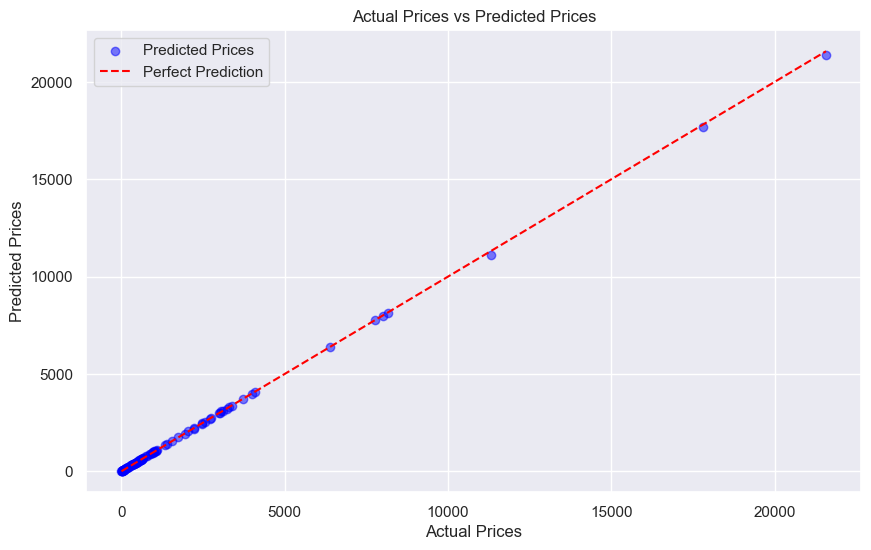

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()


Classification

In [78]:
df_merged['Percentage Change'] = pd.to_numeric(df_merged['Percentage Change'], errors='coerce')

df_merged['Target'] = (df_merged['Percentage Change'] > 0).astype(int)

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

features = ['Open', 'High', 'Low', 'Previous Close', 'Share Volume','Value (Indian Rupee)',
            '52 Week High', '52 Week Low', '365 Day Percentage Change', '30 Day Percentage Change']
target = 'Target'

X = df_merged[features]
y = df_merged[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM model with GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(random_state=43), param_grid_svm, refit=True, verbose=1, cv=5)
grid_svm.fit(X_train, y_train)
print(f"Best SVM parameters: {grid_svm.best_params_}")
best_svm_model = grid_svm.best_estimator_

# Linear SVM model with GridSearchCV
param_grid_lsvm = {
    'C': [0.1, 1, 10, 100]
}

grid_lsvm = GridSearchCV(LinearSVC(random_state=43, max_iter=10000), param_grid_lsvm, refit=True, verbose=1, cv=5)
grid_lsvm.fit(X_train, y_train)

print(f"Best Linear SVM parameters: {grid_lsvm.best_params_}")
best_lsvm_model = grid_lsvm.best_estimator_

# Predictions
svm_pred = best_svm_model.predict(X_test)
lsvm_pred = best_lsvm_model.predict(X_test)

# Metrics for SVM
accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)
f1_svm = f1_score(y_test, svm_pred)

accuracy_lsvm = accuracy_score(y_test, lsvm_pred)
precision_lsvm = precision_score(y_test, lsvm_pred)
recall_lsvm = recall_score(y_test, lsvm_pred)
f1_lsvm = f1_score(y_test, lsvm_pred)

cv_scores_svm = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy of SVM: {cv_scores_svm.mean()}")

cv_scores_lsvm = cross_val_score(best_lsvm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy of Linear SVM: {cv_scores_lsvm.mean()}")

print(f'SVM Evaluation:')
print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 Score: {f1_svm}')

print(f'Linear SVM Evaluation:')
print(f'Accuracy: {accuracy_lsvm}')
print(f'Precision: {precision_lsvm}')
print(f'Recall: {recall_lsvm}')
print(f'F1 Score: {f1_lsvm}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVM parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Linear SVM parameters: {'C': 100}
Cross-validated accuracy of SVM: 0.6
Cross-validated accuracy of Linear SVM: 0.7424999999999999
SVM Evaluation:
Accuracy: 0.504950495049505
Precision: 0.504950495049505
Recall: 1.0
F1 Score: 0.6710526315789473
Linear SVM Evaluation:
Accuracy: 0.7524752475247525
Precision: 0.6805555555555556
Recall: 0.9607843137254902
F1 Score: 0.7967479674796748


In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create and train the SVM model
svc_best_model = SVC(kernel='linear') 
svc_best_model.fit(X_train, y_train)

# Perform cross-validation
cross_val_scores = cross_val_score(svc_best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validated Accuracy: {cross_val_scores.mean()}')


Cross-validated Accuracy: 0.6


Random Forest for Regression


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['Open', 'High', 'Low', 'Previous Close', 'Share Volume'] + list(encoded_df.columns)
target_reg = 'Last Traded Price'

X_reg = df_merged[features]
y_reg = df_merged[target_reg]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_regressor.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f'Regression Model Evaluation:')
print(f'Mean Squared Error: {mse_reg}')
print(f'R^2 Score: {r2_reg}')


Regression Model Evaluation:
Mean Squared Error: 36988.212380561534
R^2 Score: 0.9964170867293463


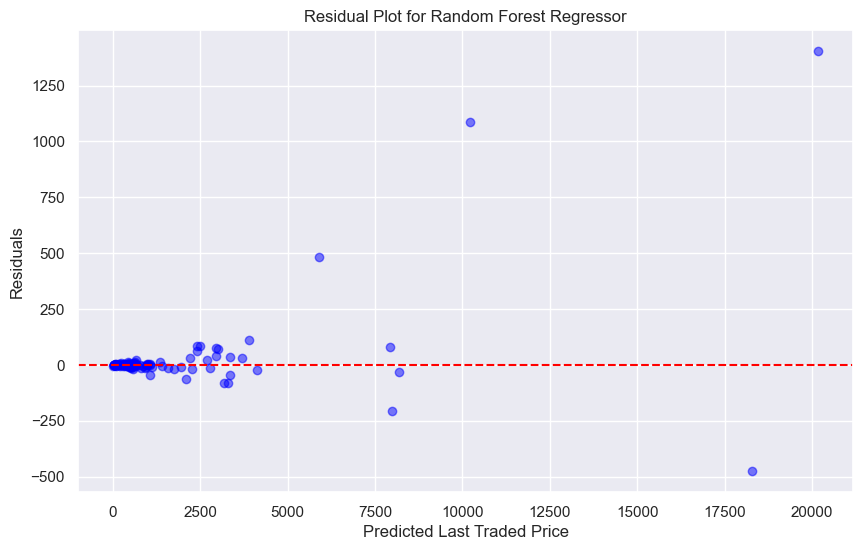

In [82]:
residuals = y_test_reg - y_pred_reg

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Last Traded Price')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regressor')
plt.show()


Random forest for Classification

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE

# Define target and features
target_class = 'Target'
features = ['Open', 'High', 'Low', 'Previous Close', 'Share Volume', 'Value (Indian Rupee)',
            '52 Week High', '52 Week Low', '365 Day Percentage Change', '30 Day Percentage Change'] + list(encoded_df.columns)

# Prepare data
X_class = df_merged[features]
y_class = df_merged[target_class]
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = rf_classifier.predict(X_test_class)

# Calculate metrics
accuracy_class = accuracy_score(y_test_class, y_pred_class)
precision_class = precision_score(y_test_class, y_pred_class)
recall_class = recall_score(y_test_class, y_pred_class)
f1_class = f1_score(y_test_class, y_pred_class)

# Feature Selection using RFE
rfe = RFE(rf_classifier, n_features_to_select=5)
rfe.fit(X_train_class, y_train_class)
selected_features = X_class.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_class, y_train_class, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean()}")

# Print evaluation metrics
print(f'Classification Model Evaluation:')
print(f'Accuracy: {accuracy_class}')
print(f'Precision: {precision_class}')
print(f'Recall: {recall_class}')
print(f'F1 Score: {f1_class}')


Selected Features: Index(['Open', 'Share Volume', 'Value (Indian Rupee)',
       '365 Day Percentage Change', '30 Day Percentage Change'],
      dtype='object')
Cross-validated accuracy: 0.6075
Classification Model Evaluation:
Accuracy: 0.6336633663366337
Precision: 0.609375
Recall: 0.7647058823529411
F1 Score: 0.6782608695652174


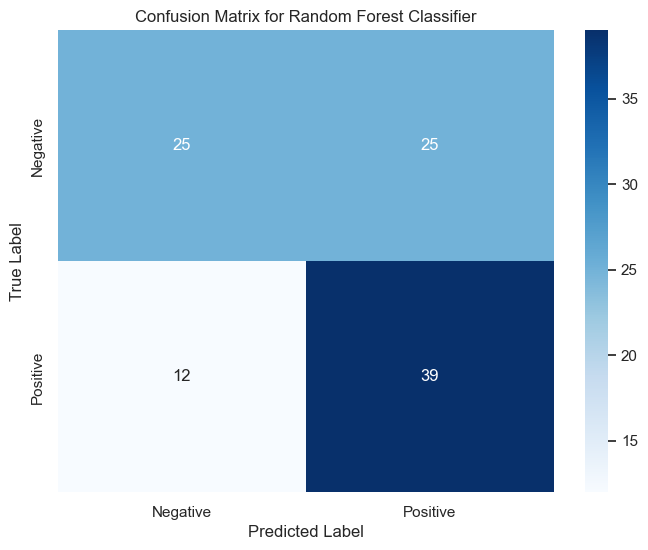

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix_class = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_class, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


Compairing Results


Regression Model Evaluation (Linear Regression):
Mean Squared Error: 1044.907704955008
R^2 Score: 0.999898783600457

Regression Model Evaluation (Random Forest Regressor):
Mean Squared Error: 36988.212380561534
R^2 Score: 0.9964170867293463

Classification Model Evaluation (SVM):
Accuracy: 0.504950495049505
Precision: 0.504950495049505
Recall: 1.0
F1 Score: 0.6710526315789473

Classification Model Evaluation (Linear SVM):
Accuracy: 0.7524752475247525
Precision: 0.6805555555555556
Recall: 0.9607843137254902
F1 Score: 0.7967479674796748

Classification Model Evaluation (Random Forest Classifier):
Accuracy: 0.6336633663366337
Precision: 0.609375
Recall: 0.7647058823529411
F1 Score: 0.6782608695652174


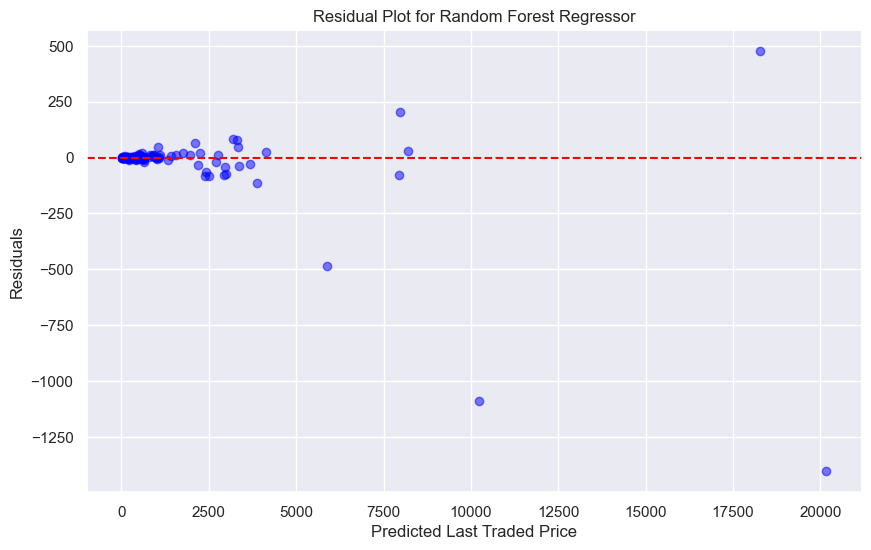

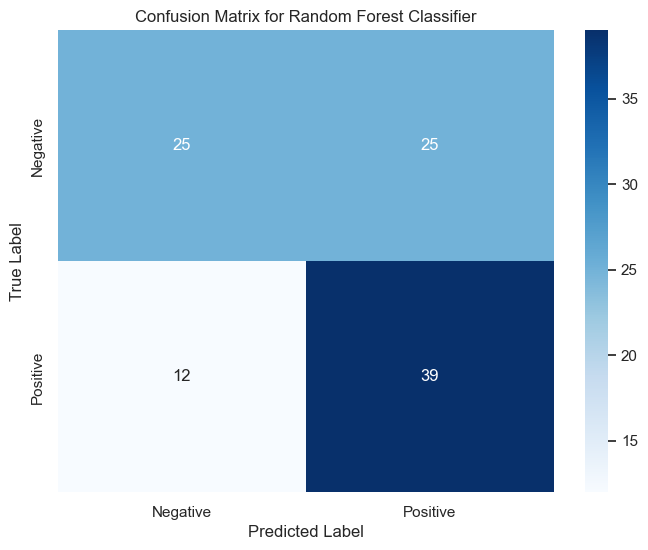


Regression Model Comparison:
Linear Regression - Mean Squared Error: 1044.907704955008
Linear Regression - R^2 Score: 0.999898783600457
Random Forest Regressor - Mean Squared Error: 36988.212380561534
Random Forest Regressor - R^2 Score: 0.9964170867293463

Classification Model Comparison:
SVM - Accuracy: 0.504950495049505
Linear SVM - Accuracy: 0.7524752475247525
Random Forest Classifier - Accuracy: 0.6336633663366337
SVM - Precision: 0.504950495049505
Linear SVM - Precision: 0.6805555555555556
Random Forest Classifier - Precision: 0.609375
SVM - Recall: 1.0
Linear SVM - Recall: 0.9607843137254902
Random Forest Classifier - Recall: 0.7647058823529411
SVM - F1 Score: 0.6710526315789473
Linear SVM - F1 Score: 0.7967479674796748
Random Forest Classifier - F1 Score: 0.6782608695652174


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming the results have already been calculated and stored in variables

# Regression Model Results
print("Regression Model Evaluation (Linear Regression):")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

print("\nRegression Model Evaluation (Random Forest Regressor):")
print(f"Mean Squared Error: {mse_reg}")
print(f"R^2 Score: {r2_reg}")

# Classification Model Results
print("\nClassification Model Evaluation (SVM):")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

print("\nClassification Model Evaluation (Linear SVM):")
print(f"Accuracy: {accuracy_lsvm}")
print(f"Precision: {precision_lsvm}")
print(f"Recall: {recall_lsvm}")
print(f"F1 Score: {f1_lsvm}")

print("\nClassification Model Evaluation (Random Forest Classifier):")
print(f"Accuracy: {accuracy_class}")
print(f"Precision: {precision_class}")
print(f"Recall: {recall_class}")
print(f"F1 Score: {f1_class}")

# Residual Plot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, y_pred_reg - y_test_reg, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Last Traded Price')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regressor')
plt.show()

# Confusion Matrix for Random Forest Classifier
conf_matrix_class = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_class, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Comparison of Regression Models
print("\nRegression Model Comparison:")
print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R^2 Score: {r2}")
print(f"Random Forest Regressor - Mean Squared Error: {mse_reg}")
print(f"Random Forest Regressor - R^2 Score: {r2_reg}")

# Comparison of Classification Models
print("\nClassification Model Comparison:")
print(f"SVM - Accuracy: {accuracy_svm}")
print(f"Linear SVM - Accuracy: {accuracy_lsvm}")
print(f"Random Forest Classifier - Accuracy: {accuracy_class}")

print(f"SVM - Precision: {precision_svm}")
print(f"Linear SVM - Precision: {precision_lsvm}")
print(f"Random Forest Classifier - Precision: {precision_class}")

print(f"SVM - Recall: {recall_svm}")
print(f"Linear SVM - Recall: {recall_lsvm}")
print(f"Random Forest Classifier - Recall: {recall_class}")

print(f"SVM - F1 Score: {f1_svm}")
print(f"Linear SVM - F1 Score: {f1_lsvm}")
print(f"Random Forest Classifier - F1 Score: {f1_class}")
